<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [4]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [5]:
seaborn.__version__

'0.9.0'

In [6]:
dataset = pandas.read_csv('./datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [7]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [8]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [9]:
dataset[important_cols].head()#[data['countries']=='Argentina']

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

Define el dataframe como 'data'

In [10]:
data = dataset[important_cols]

Veo el rango de 'data':

In [11]:
data.describe().loc[['min','max']]

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
min,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.88,1.0,3.765827,1.0
max,2016.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.19,162.0,9.126313,162.0


Media, mediana y desviación estándar de las variables 'pf_identity' y 'hf_score' en el mundo y en Latinoamérica y el Caribe (LAyC):

In [12]:
a = {'latinoamérica y caribe':data[['pf_identity','hf_score']][data['region'] == 'Latin America & the Caribbean'].describe().loc[['mean','std','50%']],
'mundo':data[['pf_identity','hf_score']].describe().loc[['mean','std','50%']]}

pandas.concat(a, axis=1)

latinoamérica y caribe                 mundo          
                pf_identity  hf_score pf_identity  hf_score
mean               8.765086  7.047982    7.334180  6.993444
std                1.711732  0.608904    3.159473  1.025811
50%               10.000000  7.028045    9.166667  6.923840

La media para las variables 'pf_identity' y 'hf_score' son mayores en LAyC comparadas con el mundo.
La desviación de ambas variables para LAyC es menor comparada con el mundo.
Por su parte, la mediana de 'pf_identity' en LAyC es de 10., mientras que para el mundo es de aproximadamente 9.17. La mediana de 'hf_score' en LAyC es de aproximadamente 7.03 mientras que para el mundo es de aproximadamente 6.92.
El rango de 'pf_identity' para LAyC es [5.-10.] mientras que para el mundo es [0.-10]. Por su parte, el rango de 'pf_identity' para el mundo es [4.20-8.29] mientras que para el mundo es [3.77-9.13].

¿Tiene sentido calcular la moda?

Teniendo en cuenta que las variables son contínuas no se espera que se repitan los mismos valores una cantidad significativa de veces por lo que se considera que no tiene sentido calcular la moda.

¿Son todos los valores de pf_identity y hf_score directamente comparables?

Los valores de 'pf_identity' y 'hf_score' no son directamente comparables entre distintos países, pues estas variables contienen información sobre distintos aspectos como: libertad económica, identidad legal, parental, de casamiento/divorcio, etc. Al compararlos se perdería información sobre las características particulares de cada uno de los aspectos mencionados.
Además, si consideramos que la construcción de estas variables es a través de medias ponderadas, sería interesante que la varianza en las variables componentes, como 'pf_identity', sean consideradas a la hora de la construcción de variables derivadas como 'hf_score'. Una muy mala calificación en alguno de estos aspectos puede pasar desapercibida en las medias y sin embargo, al ser variables sensibles, una muy mala calificación en cualquier aspecto debe ser visualizada en las variables derivadas.
También es importante tener en cuenta el desarrollo histórico, cultural y económico que existen en países de distintas regiones. Podría ser interesante también poder estudiar la evolución de los países en sus distintas regiones en cuanto a libertades pesronales y económicas.

¿Qué otra variable podría influenciarlos?

Se observó que no se considera explícitamente que se sea legal el matrimonio igualitario.
Si bien está considerado el acceso al aborto legal, seguro y gratuito, no contempla casos en países donde sólo está reglamentado para algunos estados o ciudades (como el caso de México, donde sólo es legal en DF).
Si bien en el trabajo se menciona la intención de considerar la no penalización del consumo de drogas, aclara que no tuvo acceso a los datos para esto. Este punto sería importante a considerar.
También tener en cuenta el valor de estas variables para años anteriores.

¿Cómo pueden sanearse los valores faltantes?

Asignarle el valor promedio de la región: (desventajas) si la desviación estándar es muy grande en la región entonces podemos estar modificando mucho el valor real de esta variable (no sería representativo) (ventaja) las regiones tienen desarrollos sociales, culturales, históricas y económicos similares.
Borrarlos: (desventajas) Se pierde información sobre países y disminuís el tamaño de la muestra. (ventajas) No se introduce sesgo. No se asume información sobre la región.

Respecto a los datos que faltan en años por falta de registro en los primeros años (por no haber sido una variable considerada por estos registros) se puede sugerir asginarle un valor nulo )(cero). Esto se puede hacer sólo si es una característica de todos los países. De este modo, se afecta a todos por igual. Una de las desventajas es que estos datos no podrán ser comparables en el tiempo, pues daría que hay un salto en el tiempo en alguna de las variables. Esta iformación no puede ser interpretada por un crecimiento.


¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

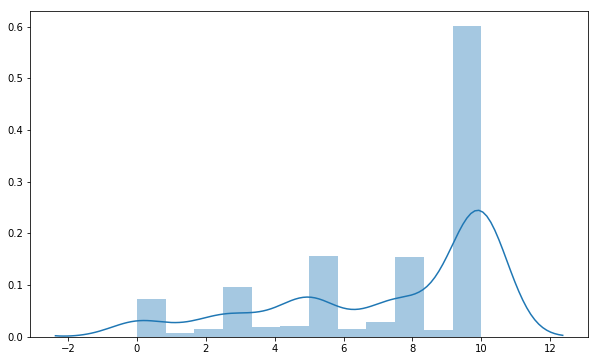

In [13]:
plt.figure(figsize=(10,6))
seaborn.distplot(data[['pf_identity']].dropna())

/home/juani/miniconda3/envs/tesis/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juani/miniconda3/envs/tesis/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


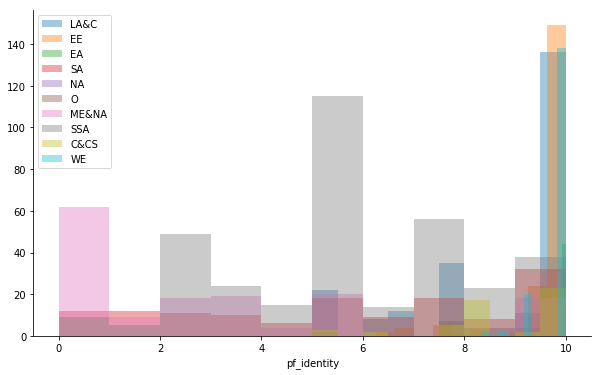

In [14]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    data[data['region'] == 'Latin America & the Caribbean']['pf_identity'],
    bins=10, label='LA&C',kde=False)
seaborn.distplot(
    data[data['region'] == 'Eastern Europe']['pf_identity'],
    bins=10, label='EE',kde=False)
seaborn.distplot(
    data[data['region'] == 'East Asia']['pf_identity'],
    bins=10, label='EA',kde=False)
seaborn.distplot(
    data[data['region'] == 'South Asia']['pf_identity'],
    bins=10, label='SA',kde=False)
seaborn.distplot(
    data[data['region'] == 'North America']['pf_identity'],
    bins=10, label='NA',kde=False)
seaborn.distplot(
    data[data['region'] == 'Oceania']['pf_identity'],
    bins=10, label='O',kde=False)
seaborn.distplot(
    data[data['region'] == 'Middle East & North Africa']['pf_identity'],
    bins=10, label='ME&NA',kde=False)
seaborn.distplot(
    data[data['region'] == 'Sub-Saharan Africa']['pf_identity'],
    bins=10, label='SSA',kde=False)
seaborn.distplot(
    data[data['region'] == 'Caucasus & Central Asia']['pf_identity'],
    bins=10, label='C&CS',kde=False)
seaborn.distplot(
    data[data['region'] == 'Western Europe']['pf_identity'],
    bins=10, label='WE',kde=False)
plt.legend()
seaborn.despine()

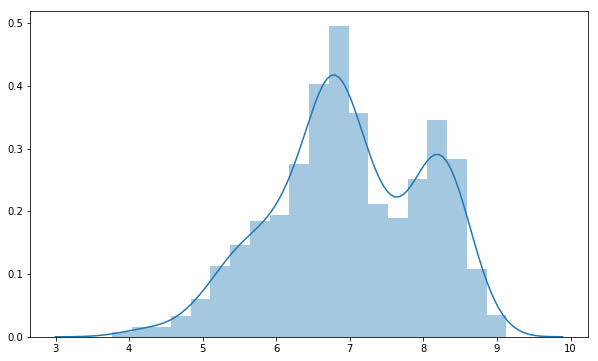

In [15]:
plt.figure(figsize=(10,6))
seaborn.distplot(data[['hf_score']].dropna())

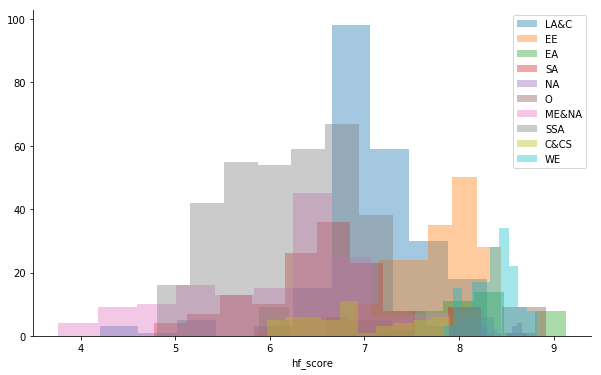

In [16]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    data[data['region'] == 'Latin America & the Caribbean']['hf_score'],
    bins=10, label='LA&C',kde=False)
seaborn.distplot(
    data[data['region'] == 'Eastern Europe']['hf_score'],
    bins=10, label='EE',kde=False)
seaborn.distplot(
    data[data['region'] == 'East Asia']['hf_score'],
    bins=10, label='EA',kde=False)
seaborn.distplot(
    data[data['region'] == 'South Asia']['hf_score'],
    bins=10, label='SA',kde=False)
seaborn.distplot(
    data[data['region'] == 'North America']['hf_score'],
    bins=10, label='NA',kde=False)
seaborn.distplot(
    data[data['region'] == 'Oceania']['hf_score'],
    bins=10, label='O',kde=False)
seaborn.distplot(
    data[data['region'] == 'Middle East & North Africa']['hf_score'],
    bins=10, label='ME&NA',kde=False)
seaborn.distplot(
    data[data['region'] == 'Sub-Saharan Africa']['hf_score'],
    bins=10, label='SSA',kde=False)
seaborn.distplot(
    data[data['region'] == 'Caucasus & Central Asia']['hf_score'],
    bins=10, label='C&CS',kde=False)
seaborn.distplot(
    data[data['region'] == 'Western Europe']['hf_score'],
    bins=10, label='WE',kde=False)
plt.legend()
seaborn.despine()

La distribución de los datos en los histogramas no nos llevan a pensar en la existencia de outliers para estas dos variables. De todas maneras vamos a analizarlo mediante el método utilizado por los boxplots (Es decir, cuartil $\pm$ 1.5*rango intercuartílico). Analizamos los outliers por regiones, ya que consideramos que los valores de estas variables tienen que ver con un contexto histórico y social, el cual usualmente es compartido dentro de una región. Además compararemos un solo año, ya que año a año se agregan nuevas componentes al cálculo de estas variables.

In [17]:
outliers = {}
medians = {}
for i, reg in enumerate(data.region.unique()):
    #print(i)
    outliers[reg] = [0,[]]
    data2 = data[important_cols][(data.year == 2016) & (data.region == reg)]
    pfid_25 = data2['pf_identity'].quantile(q = 0.25)
    pfid_75 = data2['pf_identity'].quantile(q = 0.75)
    medians[reg] = data2['pf_identity'].median()
    for _,case in data2.iterrows():
        if (case['pf_identity'] > pfid_75 + 1.5*(pfid_75-pfid_25)) or (case['pf_identity'] < pfid_25 - 1.5*(pfid_75-pfid_25)):
            outliers[reg][0] +=1
            outliers[reg][1].append([case['countries'],case['pf_identity']])

In [18]:
outliers

{'Eastern Europe': [3,
  [['Albania', 6.25], ['Belarus', 8.0], ['Greece', 6.75]]],
 'Middle East & North Africa': [2, [['Israel', 10.0], ['Turkey', 9.25]]],
 'Sub-Saharan Africa': [0, []],
 'Latin America & the Caribbean': [0, []],
 'Caucasus & Central Asia': [2, [['Azerbaijan', 6.25], ['Kazakhstan', 9.25]]],
 'Oceania': [1, [['Pap. New Guinea', 7.5]]],
 'Western Europe': [0, []],
 'South Asia': [0, []],
 'North America': [0, []],
 'East Asia': [1, [['Taiwan', 10.0]]]}

In [19]:
medians

{'Eastern Europe': 9.25,
 'Middle East & North Africa': 0.833333333,
 'Sub-Saharan Africa': 5.3125,
 'Latin America & the Caribbean': 7.5,
 'Caucasus & Central Asia': 8.0,
 'Oceania': 9.25,
 'Western Europe': 9.25,
 'South Asia': 5.5,
 'North America': 9.25,
 'East Asia': 9.25}

Podemos observar que con este criterio, se encuentran varios outliers. De todas maneras, los únicos que realmente se encuentran totalmente diferenciados de su región son los valores de Turquía e Israel. Esto se debe a que estos países han tenido su desarrollo ligado a Europa, y por lo tanto pueden haber seguido una evolución similar a los países de esta región. De todas maneras, por una cuestión de completitud y porque son países bastante paradigmáticos de la región decidimos no descartar ningún outlier, ni siquiera estos dos.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

**Variable pf_identity. Media global a través de los años.**

No handles with labels found to put in legend.


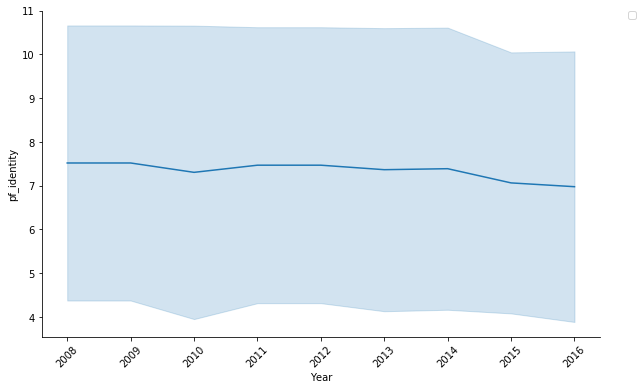

In [20]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=data,
                  x='year', y='pf_identity',
                  ci='sd')
plt.ylabel('pf_identity')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

**Variable hf_score. Media global a través de los años.**

No handles with labels found to put in legend.


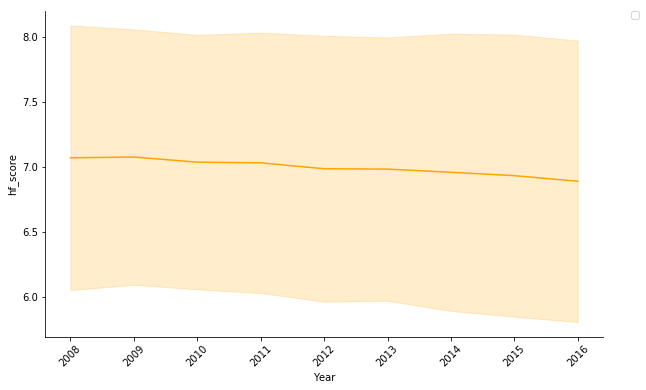

In [25]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=data,
                  x='year', y='hf_score',
                  ci='sd', color='orange')
plt.ylabel('hf_score')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

**Variable pf_identity. Media regional a través de los años.**

No handles with labels found to put in legend.


Eastern Europe


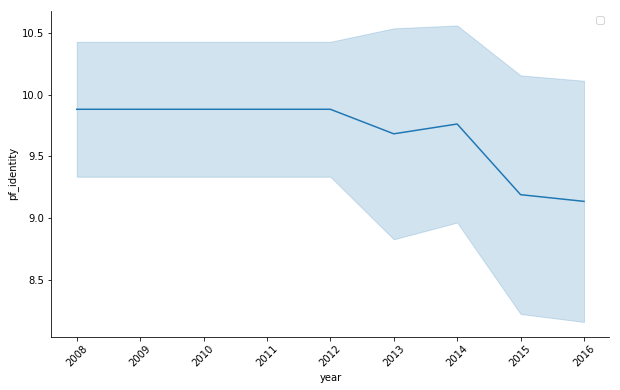

No handles with labels found to put in legend.


Middle East & North Africa


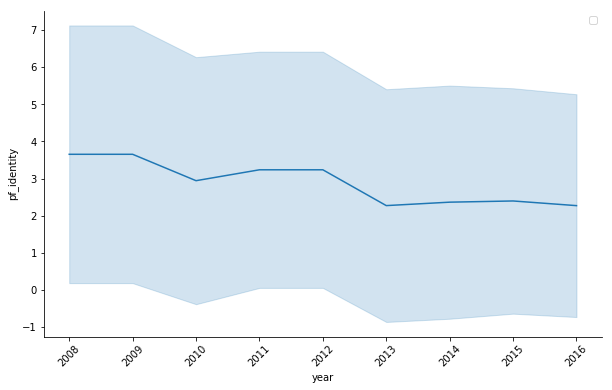

No handles with labels found to put in legend.


Sub-Saharan Africa


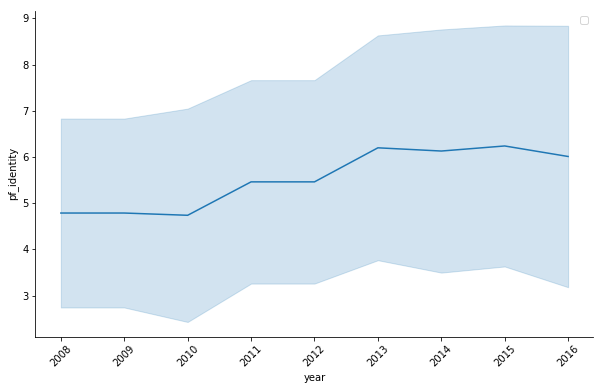

No handles with labels found to put in legend.


Latin America & the Caribbean


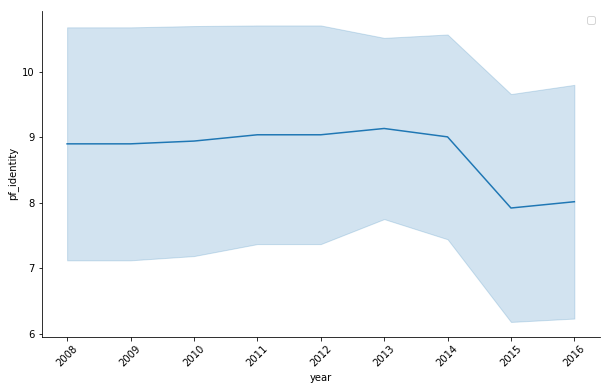

No handles with labels found to put in legend.


Caucasus & Central Asia


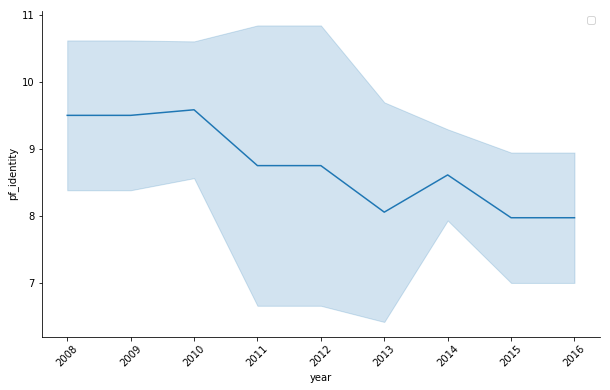

No handles with labels found to put in legend.


Oceania


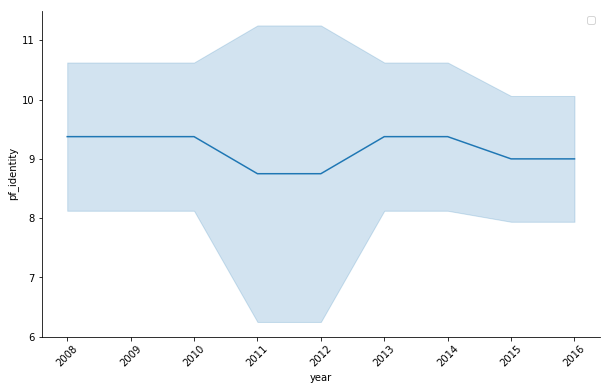

No handles with labels found to put in legend.


Western Europe


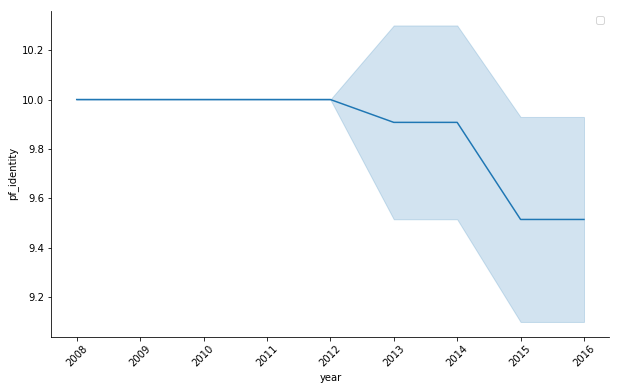

No handles with labels found to put in legend.


South Asia


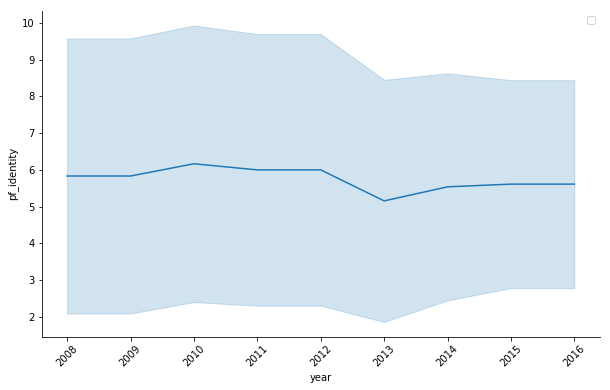

No handles with labels found to put in legend.


North America


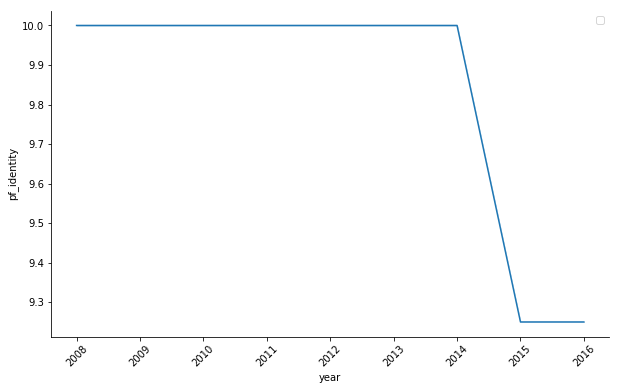

No handles with labels found to put in legend.


East Asia


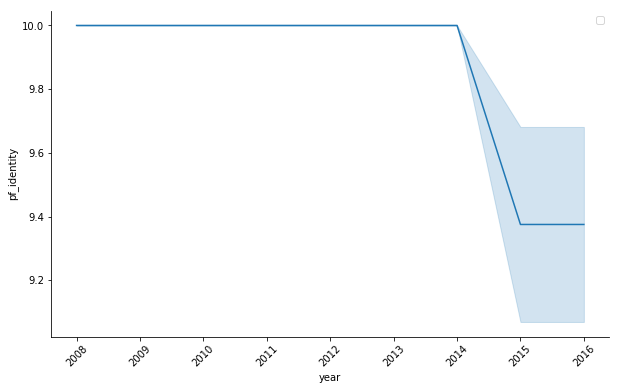

In [22]:
for region in data.region.unique():
    plt.figure(figsize=(10,6))
    seaborn.lineplot(data=data[data.region == region],
                      x='year', y='pf_identity', ci='sd')
    plt.ylabel('pf_identity')
    plt.xlabel('year')
    plt.xticks(rotation=45)
    print(region)
    plt.legend()
    seaborn.despine()
    plt.show()

**Variable hf_score. Media regional a través de los años.**

No handles with labels found to put in legend.


Eastern Europe


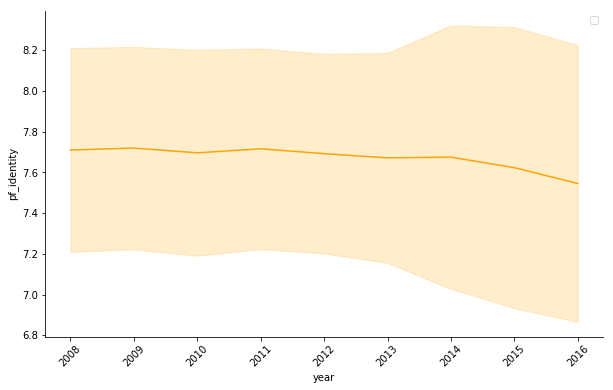

No handles with labels found to put in legend.


Middle East & North Africa


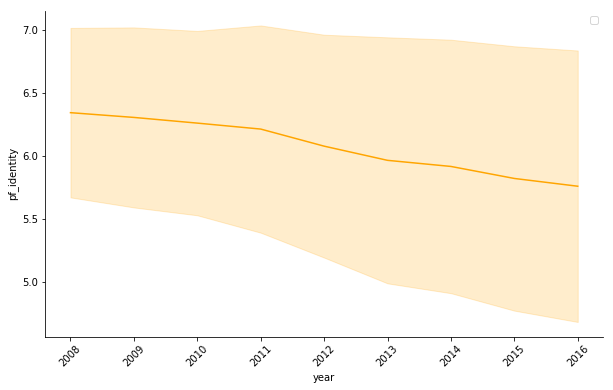

No handles with labels found to put in legend.


Sub-Saharan Africa


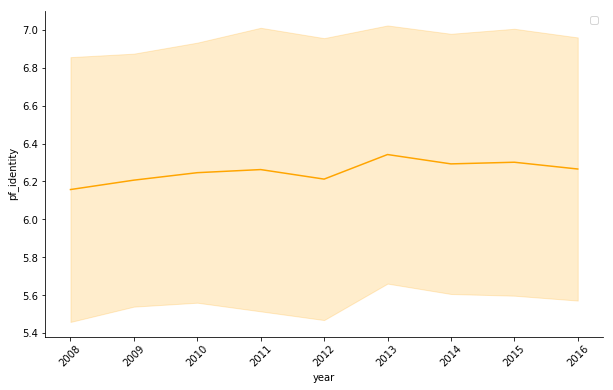

No handles with labels found to put in legend.


Latin America & the Caribbean


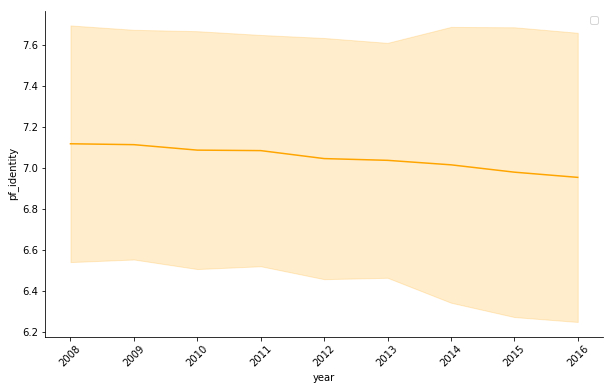

No handles with labels found to put in legend.


Caucasus & Central Asia


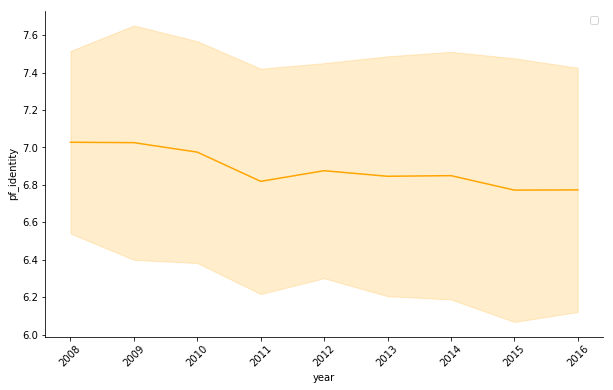

No handles with labels found to put in legend.


Oceania


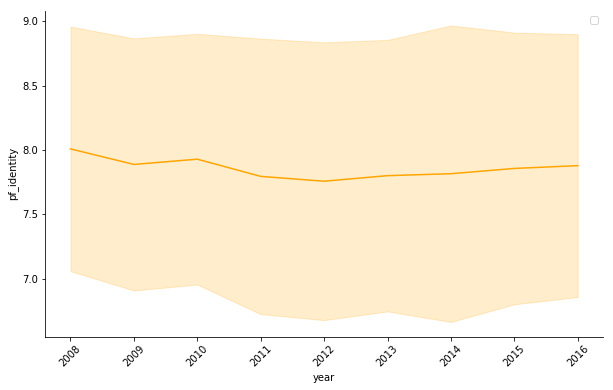

No handles with labels found to put in legend.


Western Europe


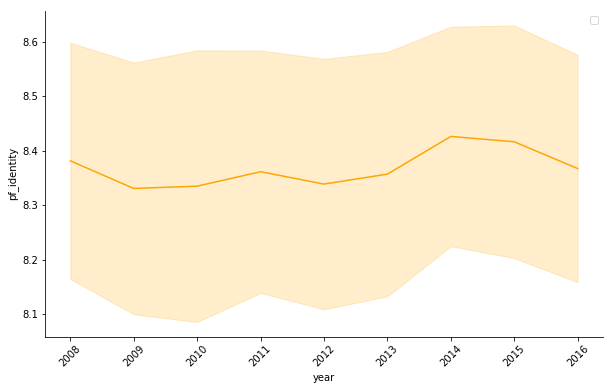

No handles with labels found to put in legend.


South Asia


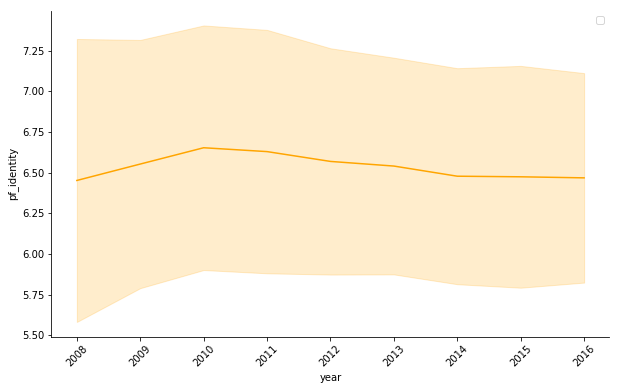

No handles with labels found to put in legend.


North America


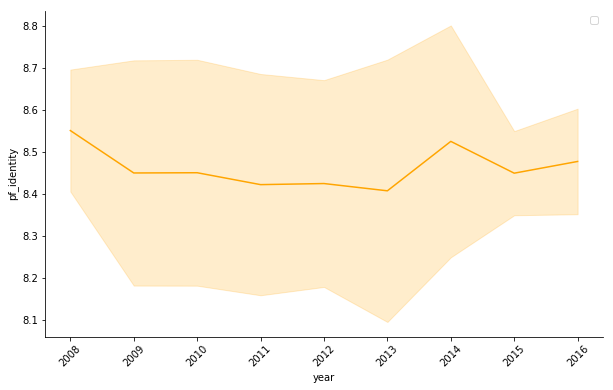

No handles with labels found to put in legend.


East Asia


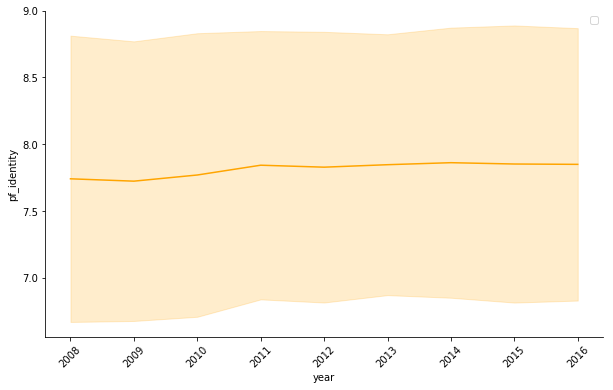

In [24]:
for region in data.region.unique():
    plt.figure(figsize=(10,6))
    seaborn.lineplot(data=data[data.region == region],
                      x='year', y='hf_score', ci='sd', color = 'orange')
    plt.ylabel('pf_identity')
    plt.xlabel('year')
    plt.xticks(rotation=45)
    print(region)
    plt.legend()
    seaborn.despine()
    plt.show()

No handles with labels found to put in legend.


Argentina


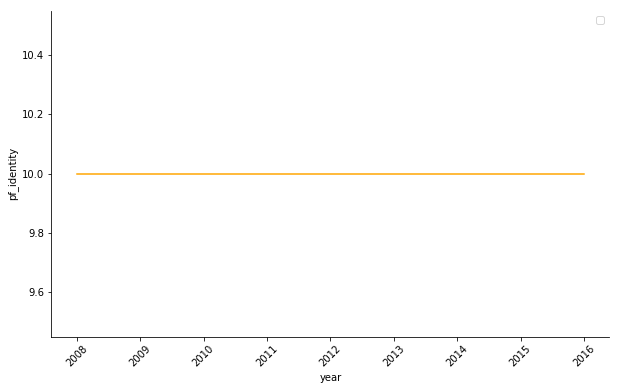

No handles with labels found to put in legend.


Uruguay


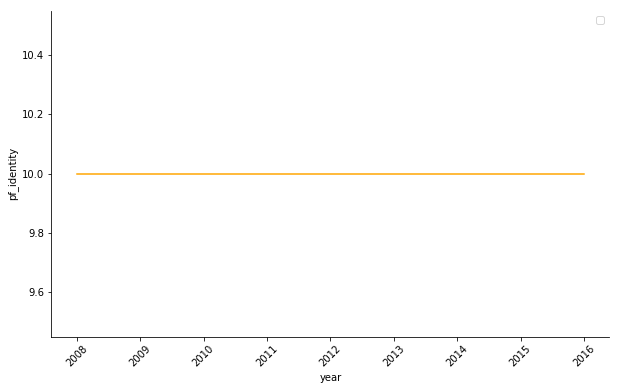

No handles with labels found to put in legend.


Mexico


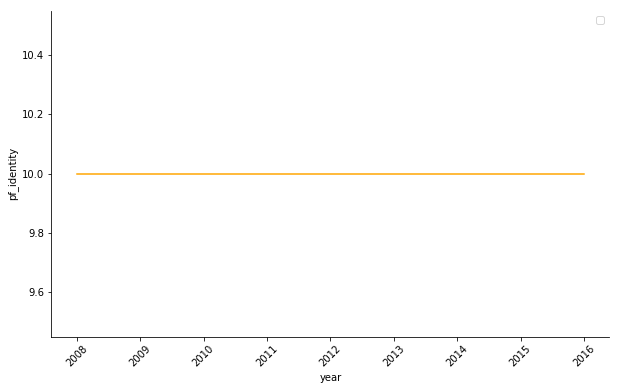

No handles with labels found to put in legend.


Brazil


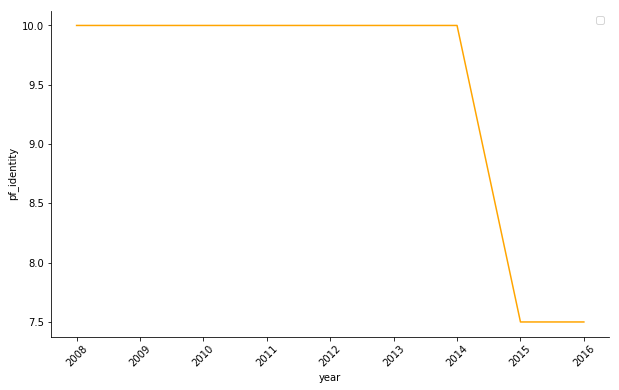

No handles with labels found to put in legend.


Venezuela


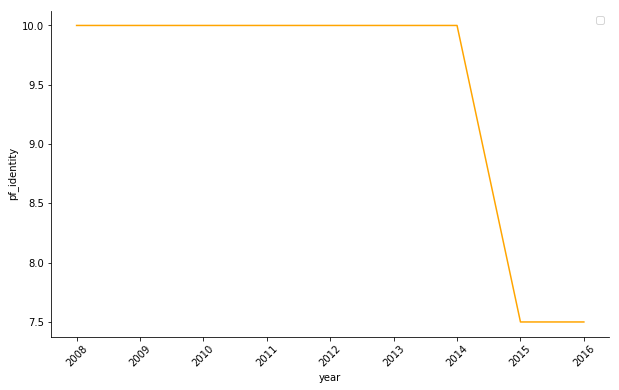

In [27]:
for country in ['Argentina', 'Uruguay', 'Mexico', 'Brazil', 'Venezuela']:
    plt.figure(figsize=(10,6))
    seaborn.lineplot(data=data[data.countries == country],
                      x='year', y='pf_identity', ci='sd', color = 'orange')
    #display(data[data.countries == country])
    plt.ylabel('pf_identity')
    plt.xlabel('year')
    plt.xticks(rotation=45)
    print(country)
    plt.legend()
    seaborn.despine()
    plt.show()

Sin la clasificación por regiones, vemos una 'pf_identity' se reduce en el intervalo de años 2014-2015.
Esto se sigue observando para todas las distintas regiones, aunque el comportamiento para las distintas regiones en particular exhiben distintos comportamiento.
Esto lo podemos explicar porque se introduce, dentro de la variable 'pf_identity', la variable 'pf_identity_legal' la cual no tiene datos hasta el año 2015. Esto, en la mayoría de los casos, reduce el promedio del valor 'pf_identity'.
Respecto a la variable 'hf_score', podemos decir que no se observan que se repita el comportamiento general para todas las regiones.
Cabe aclarar, que las varianzas en ambas variables son muy grandes por lo que es difícil asignarle algún comportamiento claro.

Si analizamos la variable 'pf_identity' en los países: Argentina, Uruguay, Brasil, México y Venezuela vemos que sólo Brasil y Venezuela decrecen de 10 a 7.5 en el año 2015. Analizando las variable que componene "pf_identity' vemos que esto es producto de la incorporación de la variable 'pf_identity_legal', en la cual ambos países tienen un valor de cero. Elegimos estos países por ser los más grandes de la región.

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

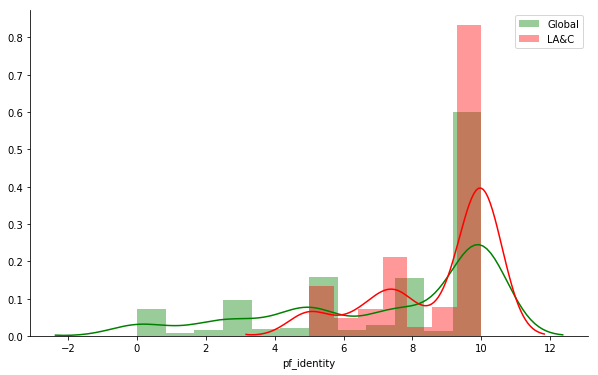

In [95]:
pf_identity_global = data['pf_identity']
pf_identity_LAyC = data['pf_identity'][data.region=='Latin America & the Caribbean']
plt.figure(figsize=(10,6))
seaborn.distplot(pf_identity_global.dropna(), color='green', label='Global')
seaborn.distplot(pf_identity_LAyC.dropna(), color='red', label='LA&C')
plt.legend()
seaborn.despine()

En principio, no podemos decir con certeza a qué distribución pertenece. Reconocemos que ambos histogramas tienen una moda de 10 y son asimétricas respecto a la moda. La cola del histograba correspondiente a 'Global' es más larga que la segunda.

No creemos que sea del todo correcto incluir todos los registros temporales, pues vimos en el punto anterior que a través de los años se incluyen nuevos parámetros que modifican de manera sustancial el valor de la variable 'pf_identity'.

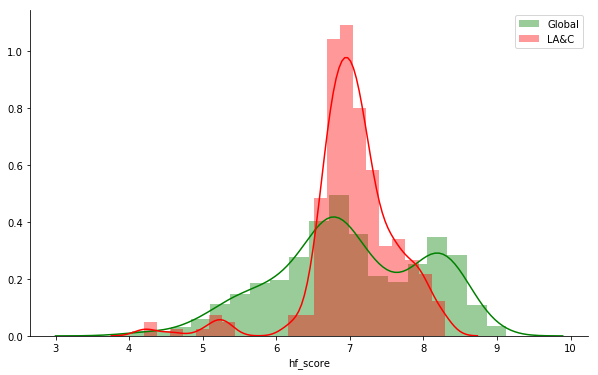

In [96]:
hf_score_global = data['hf_score']
hf_score_LAyC = data['hf_score'][data.region=='Latin America & the Caribbean']
plt.figure(figsize=(10,6))
seaborn.distplot(hf_score_global.dropna(), color='green', label='Global')
seaborn.distplot(hf_score_LAyC.dropna(), color='red', label='LA&C')
plt.legend()
seaborn.despine()

Para la variable 'hf_score' podemos observar comportamientos muy diferenciados entre el 'Global' y el 'LA&C'. Por un lado, el segundo presenta un perfil que se puede asociar al de una distribucion gaussiana, obviando el hecho de que existen, para valores entre 4 y 5, un pequeño conjunto de datos que parecen comportarse de una manera distinta. Por otro lado, para el caso del comportamiento global, se puede ver una bimodalidad explicable por la superposicion de dos gaussianas, es decir, los datos parecerían seguir dos distribuciones independientes.

Como vimos que ningún histograma presenta una distribución clara, filtramos los datos por año. Elegimos el año que más datos sabemos que tiene, que es el año 2016. Los resultados se muestran a continuación.

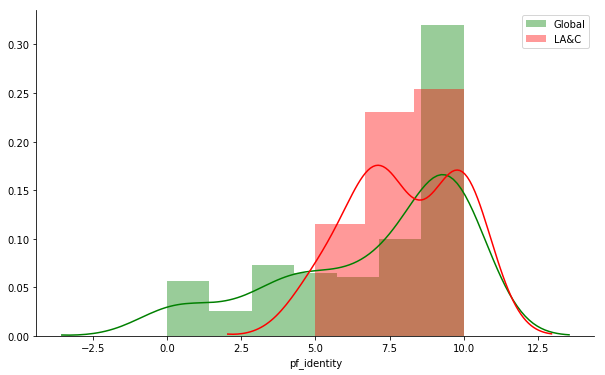

In [98]:
pf_identity_global = data['pf_identity'][data.year == 2016]
pf_identity_LAyC = data['pf_identity'][data.region=='Latin America & the Caribbean'][data.year == 2016]
plt.figure(figsize=(10,6))
seaborn.distplot(pf_identity_global.dropna(), color='green', label='Global')
seaborn.distplot(pf_identity_LAyC.dropna(), color='red', label='LA&C')
plt.legend()
seaborn.despine()

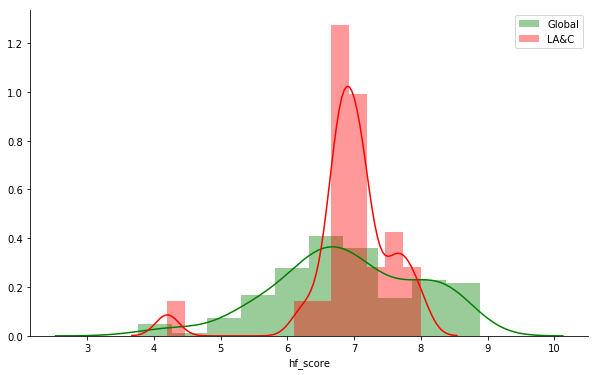

In [99]:
hf_score_global = data['hf_score'][data.year == 2016]
hf_score_LAyC = data['hf_score'][data.region=='Latin America & the Caribbean'][data.year == 2016]
plt.figure(figsize=(10,6))
seaborn.distplot(hf_score_global.dropna(), color='green', label='Global')
seaborn.distplot(hf_score_LAyC.dropna(), color='red', label='LA&C')
plt.legend()
seaborn.despine()

Una vez puesto este filtro, identificamos con más claridad que la distribución que presentan los histogramas son más similares a una distribución normal.

Realizamos una prubea de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden a una distribución normal.


In [154]:
from scipy.stats import norm,skew,kurtosis, pearsonr,spearmanr, kendalltau
from scipy import stats

import numpy as np

x = data['pf_identity'][data.year == 2016]
stats.kstest(x,'norm',args=(x.mean(),x.std()))

KstestResult(statistic=0.20528720952926371, pvalue=1.8297064120206102e-06)

In [114]:
x = data['hf_score'][data.year == 2016]
print(x.mean(),x.std())
stats.kstest(x,'norm',args=(x.mean(),x.std()))

6.889870644802468 1.0796007233951983


KstestResult(statistic=0.060565111923329695, pvalue=0.5856354659459613)

Las pruebas de KS en ambos histogramas indican que para la variable 'hf_score' es más adecuada una distribución normal para describirla que para la variable 'pf_identity'.
Esto se observa en el parámetro 'p', el cual es muy cercano a cero para el primer histograma y cercano a 0.6 para el segundo.
Lo resultados obtenidos son de esperarase, pues a simple vista se observan comportamientos que no corresponden al de una gaussiana.
A modo de ejemplo, podemos mencionar el hecho que los histogramas tienen moda en 10 y no más datos después de este número, lo que hace que se obtengan distribuciones asimétricas.

Realizamos un gráfico QQ de las distribuciones.
Utilizamos ambas distribuciones sobre todos los datos globales.

In [162]:
x = data['pf_identity'][data.year == 2016]
norm_dist = stats.norm(x.mean(), x.std())
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(x, percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(x)), percs)

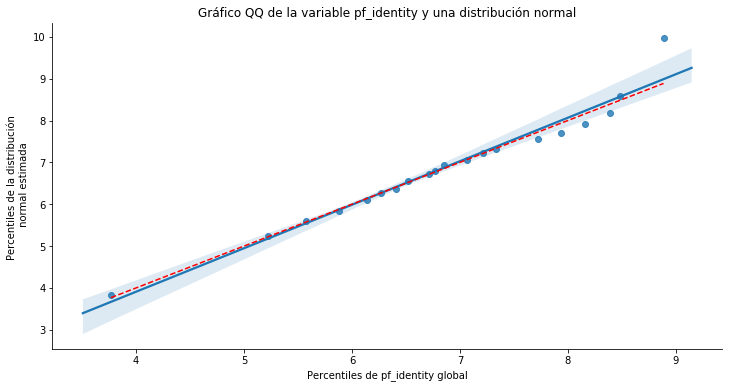

In [167]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de pf_identity global')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la variable pf_identity y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.min((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='red', ls="--")

seaborn.despine()

In [164]:
x = data['hf_score'][data.year == 2016]
norm_dist = stats.norm(x.mean(), x.std())
percs = numpy.linspace(0,100,20)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(x, percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(x)), percs)

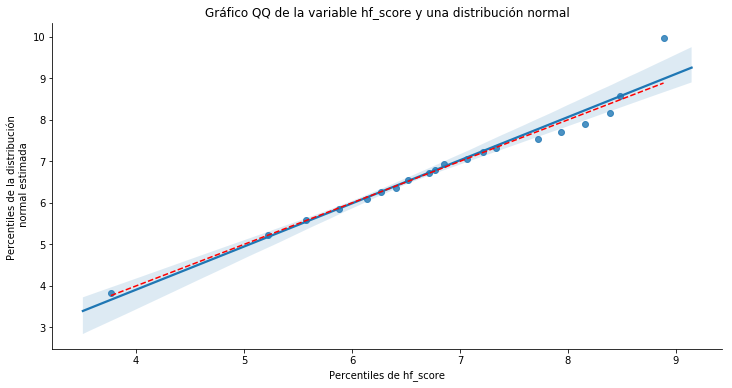

In [166]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la variable hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.min((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='red', ls="--")

seaborn.despine()

Medimos la asimetría y curtosis de las mismas distribuciones.

In [131]:
x = data['pf_identity'][data.year == 2016]
x_skew = skew(x)
x_kurtosis = kurtosis(x)
print(x_skew,x_kurtosis)

-0.8951480567448604 -0.376609391263361


In [132]:
x = data['hf_score'][data.year == 2016]
x_skew = skew(x)
x_kurtosis = kurtosis(x)
print(x_skew,x_kurtosis)

-0.29333571023556415 -0.21930964615720816


¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente?


A partir de los gráficos QQ y del valor de la asimetría obtenida podemos decir que ambas distribuciones presentan asimetría, siendo la distribución para 'pf_identity' mucho mayor.
Esto se puede observar en la distribución de los puntos alrededor de la curva azul del gráfico QQ.
Esta distribución es mayor para la variable 'pf_identity'.

# Por su parte, respecto a a la curtosis, podemos decir que (...)

¿El gráfico QQ provee más información que no esté presente en estos estadísticos?


El gráfico QQ nos permite observar cómo se diferencia una distribución de una distribución normal en los distintos rangos de la variable. Los estadísticos nos dan información sobre características generales de la distribución que se busca estudiar.


## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


Armamos un gráfico pairplot con las variables 'pf_identity', 'hf_score' y 'ef_score'.
Los resultados se muestran a continuación,

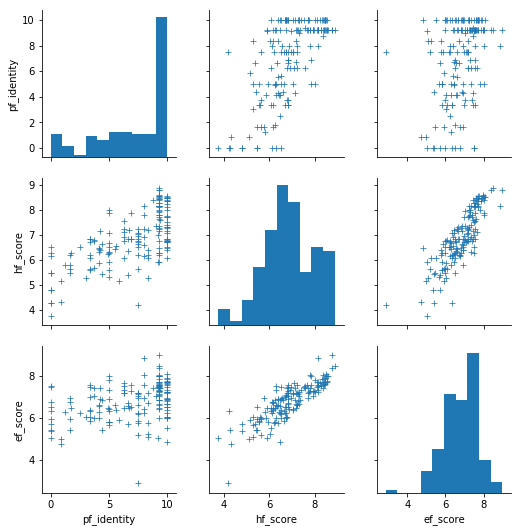

In [142]:
seaborn.pairplot(
    data=data[data.year == 2016],
    vars=['pf_identity', 'hf_score', 'ef_score'], 
    markers='+')

Las conclusiones que podemos sacar a partir de este gráfico son, por un lado vemos una clara correlación entre las variables 'hf_score' y 'ef_score'.
También, se puede observar cierta tendencia entre las variables 'hf_score' y 'pf_identity'.
No así para las variables 'pf_identity' y 'ef_score' las cuales claramente no están correlacionadas entre sí.

Consideramos que se debería usar la variable 'pf_score' en lugar de 'pf_identity' ya que esta última es sólo una parte del indicador de 'libertad personal'.

Para graficar la correlación entre las variables usamos un JointPlot. Los resultados se muestran a continuación.

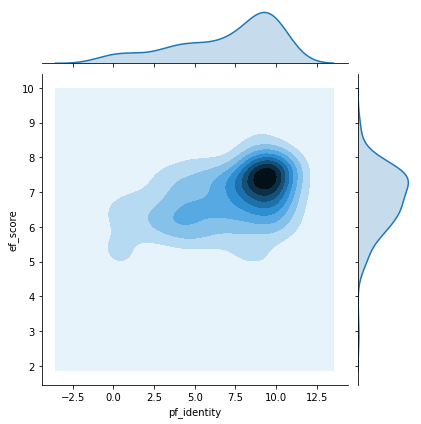

In [152]:
seaborn.jointplot(data = data[data.year == 2016], x = data[data.year == 2016].pf_identity, y = data[data.year == 2016].ef_score, kind='kde')

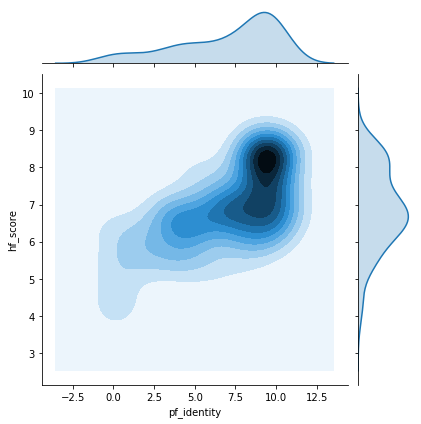

In [153]:
seaborn.jointplot(data = data[data.year == 2016], x = data[data.year == 2016].pf_identity, y = data[data.year == 2016].hf_score, kind='kde')

A partir de los resultados obtenidos podemos decir, tal como observamos en el punto anterior, que la correlación entre 'pf_identity' y 'hf_score' es más clara que para 'pf_identity' y 'ef_score'.
El gráfico segundo muestra cierto comportamiento para las variables en donde a mayores valores de 'pf_identity' se obtienen mayore svalores de 'hf_score'.

A continuación, calculamos los coeficientes de correlación de Pearson, Spearmen y Tay y Kendall de ambas distribuciones.

In [155]:
pearsonr(data[data.year == 2016].pf_identity,data[data.year == 2016].hf_score)

(0.6721206068003822, 1.2220710640219397e-22)

In [156]:
kendalltau(data[data.year == 2016].pf_identity,data[data.year == 2016].hf_score)

KendalltauResult(correlation=0.4688692762006036, pvalue=2.7272088343400493e-17)

In [157]:
spearmanr(data[data.year == 2016].pf_identity,data[data.year == 2016].hf_score)

SpearmanrResult(correlation=0.6366741510090239, pvalue=8.552977266116064e-20)

In [158]:
pearsonr(data[data.year == 2016].ef_score,data[data.year == 2016].hf_score)

(0.8432189706671603, 5.518405853462309e-45)

In [159]:
pearsonr(data[data.year == 2016].pf_identity,data[data.year == 2016].ef_score)

(0.36337538066655484, 2.0073536532850325e-06)

In [160]:
kendalltau(data[data.year == 2016].pf_identity,data[data.year == 2016].ef_score)

KendalltauResult(correlation=0.2649622329094602, pvalue=1.8157846698073137e-06)

In [161]:
spearmanr(data[data.year == 2016].pf_identity,data[data.year == 2016].ef_score)

SpearmanrResult(correlation=0.37478236441848106, pvalue=8.94407533573455e-07)

A partir de los resultados obtenidos, como esperábamos, 'pf_identity' y 'hf_score' están correlacionados a más de un 66% para las pruebas de Pearson y Spearman. Para la prueba de Kendall y Tau, la correlación es de aproximadamente 46%.
Por su parte, la correlación entre 'pf_identity' y 'ef_score' son menores al 38% para todas las pruebas que se hicieron.
Por último, también se calculó la correlación entre 'hf_score' y 'ef_score' con la correlación de Pearson, la cual fue de un 84%. Es decir, tal como se observó anteriormente, hay una clara correlación entre ambas variables.